In [1]:
### the following code snippet is given by the website for retrieving the database

%pip install ucimlrepo

from ucimlrepo import fetch_ucirepo 

# fetch dataset 
iris = fetch_ucirepo(id=53) 
  
# data (as pandas dataframes) 
X = iris.data.features 
y = iris.data.targets 
  
# metadata 
print(iris.metadata) 
  
# variable information 
print(iris.variables) 

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
{'uci_id': 53, 'name': 'Iris', 'repository_url': 'https://archive.ics.uci.edu/dataset/53/iris', 'data_url': 'https://archive.ics.uci.edu/static/public/53/data.csv', 'abstract': 'A small classic dataset from Fisher, 1936. One of the earliest known datasets used for evaluating classification methods.\n', 'area': 'Biology', 'tasks': ['Classification'], 'characteristics': ['Tabular'], 'num_instances': 150, 'num_features': 4, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1936, 'last_updated': 'Tue Sep 12 2023', 'dataset_doi': '10.24432/C56C76', 'creators': ['R. A. Fisher'], 'intro_paper': {'title': 'The Iris data set: In search of the source of virginica', 'authors': 'A. Unwin, K. Kleinman', 'published_in': 'Significanc

In [2]:
import numpy as np

# in order to center the data, I used the forumla in page 2/32 of chapter 1.3 on PCA and let it be assigned to a function,
# then I appled it to our initial data X and assigned the centered data to a new variable Xc
center_function = lambda x: x - x.mean()

Xc = center_function(X)

# numpy gives us a straightforward SVD formula that I used for the decomposition, then used
# list manipulationto print the principal components, which are of course the columns of U

U, S, VT = np.linalg.svd(Xc, full_matrices=False)


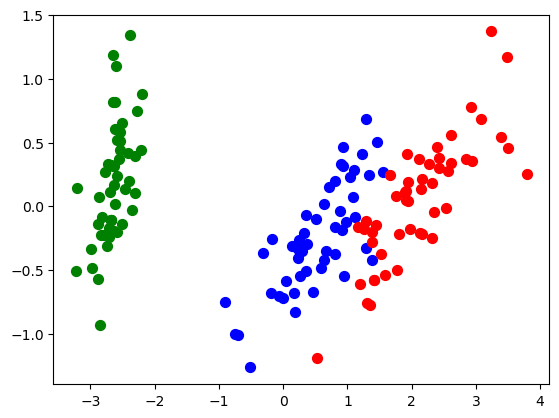

In [3]:
# sklearn gives us straightforward PCA functions just like the aformentioned numpy SVD function
# matplotlib for the requested graphs

from sklearn.decomposition import PCA
import matplotlib.pyplot as plt


# exercise 2.3.3 asks for a 2D graph, so I set the components to two
pca = PCA(n_components=2)
X_pca2D = pca.fit_transform(Xc)

# we access y's single column
ycol = y.iloc[:, 0].unique()

# I will youse gree, blue and red both for this and the following graph
colors = ['g', 'b', 'r']

for ycol, color in zip(ycol, colors):
    # Similarly, ensure 'y' is a Series or a numpy array for comparison
    plt.scatter(X_pca2D[y.iloc[:, 0] == ycol, 0], X_pca2D[y.iloc[:, 0] == ycol, 1], c=color, s=50, label=ycol)

plt.show()

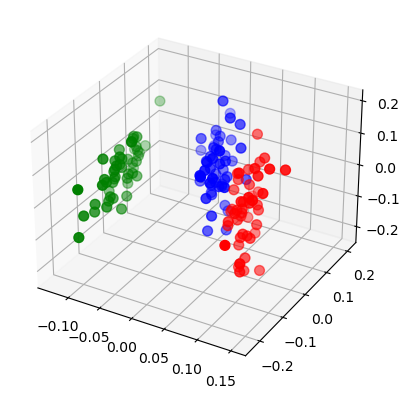

In [4]:
from mpl_toolkits.mplot3d import Axes3D

# I use the same way to access y's columns
ycol = y.iloc[:, 0].unique()

# baseline for a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot each class with its corresponding color in the 3D PCA space
for ycol, color in zip(ycol, colors):
    indicesToKeep = y.iloc[:, 0] == ycol
    ax.scatter(U[indicesToKeep, 0],  # first principal component
               U[indicesToKeep, 1],  # second principal component
               U[indicesToKeep, 2],  # third principal component
               c=color, s=50, label=ycol)

plt.show()